In [163]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-global-music-dataset-20092025/track_data_final.csv
/kaggle/input/spotify-global-music-dataset-20092025/spotify_data clean.csv


## Importing libraries and Loading the dataset

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [165]:
df = pd.read_csv("/kaggle/input/spotify-global-music-dataset-20092025/spotify_data clean.csv")
df

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8577,0AQquaENerGps8BQmbPw14,Big Iron,1,71,False,Marty Robbins,60,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30,15,album,3.92
8578,4f8hBeMXMvssn6HtFAtblo,El Paso,10,64,False,Marty Robbins,61,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30,15,album,4.32
8579,0Vy7wsXNFrbNc6UTWoScnM,Over the Rainbow,5,8,False,The Mystics,27,18184,doo-wop,2ifB9Xjp9DdpqLlYlY60QW,Presenting The Mystics,1959-02-11,9,compilation,2.28
8580,760clbeDBWmBsBLbszWuNZ,I'm A Man,2,55,False,Bo Diddley,44,333376,"blues, classic blues, rock and roll, rockabilly",1cbtDEwxCjMhglb49OgNBR,Bo Diddley,1958-01-01,12,album,2.74


## Exploring the dataset

In [166]:
df.shape

(8582, 15)

In [167]:
df.sample()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
7739,0LnkNEgEXv83bVVvgnB9Et,Come As You Are,6,54,False,Nirvana,81,23391272,"grunge, rock",5zBPRXCAc801vyHWoRurNZ,Nirvana,2002-10-29,14,compilation,3.65


In [168]:
df.head(10)

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39
5,4ccpCcZYseq8VrPMK1EDs0,BLEED,1,2,False,Minzie,46,7218,dark r&b,2NQv9p3ZQW0Ed1LB9enix8,BLEED,2025-10-30,3,single,2.76
6,3QoQ3HqXTAjgEl9LbNMbYp,Te Procuro na Cidade,1,20,False,AZERDK,30,1657,NaN,1PpuOsLjPWshDLxkr0oHeU,Te Procuro na Cidade,2025-10-30,1,single,4.12
7,1YEZbdT417SfolPQzaoHs2,come closer,1,27,False,Rumelis,49,8802,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.53
8,4pZ949nFW5SurwzE0TSe7I,Cupido Vagabundo,1,16,False,Toni dos Anjos,6,475,NaN,60DLQZkzpvDvVfvEC6VOJM,Cupido Vagabundo,2025-10-30,2,single,2.92
9,0L0LgwFZ7UtBnRNQvSBty6,LET’S GO!,1,33,True,PsychoYP,48,154802,"nigerian drill, alté, afro adura, afrobeats, a...",3ARxksm8CspGeAaZZB1v2w,LET’S GO!,2025-10-28,1,single,2.40


In [169]:
df.tail(10)

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
8572,4fQMGlCawbTkH9yPPZ49kP,Green Onions,1,69,False,Booker T. & the M.G.'s,54,339450,NaN,2aGFVLz0oQPa3uxCfq9lcU,Green Onions,1962-06-30,12,album,2.93
8573,0Jw3cPBXlGnA6DEJrZSTI0,Soul Bossa Nova,1,56,False,Quincy Jones,56,456253,"soul jazz, big band, quiet storm",1KSOL1jvue2lfcdsNZ7YN8,Big Band Bossa Nova,1962-01-01,10,album,2.77
8574,3OnCnEWgy79xR5pr2kv4TX,Misirlou,4,47,False,Dick Dale,41,137984,surf rock,7bGmjO5Cthm1SNOwUhLwKE,Wanna Surf?,1960-12-10,19,album,2.26
8575,2QfiRTz5Yc8DdShCxG1tB2,Johnny B. Goode,6,74,False,Chuck Berry,63,2211249,"rockabilly, rock and roll",6eedtCtCjibu80yOhylSGL,Berry Is On Top,1959-07-01,12,album,2.69
8576,68FTJoO8edSpzuYb6lGW6P,Saddle Tramp,14,58,False,Marty Robbins,61,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30,15,album,2.05
8577,0AQquaENerGps8BQmbPw14,Big Iron,1,71,False,Marty Robbins,60,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30,15,album,3.92
8578,4f8hBeMXMvssn6HtFAtblo,El Paso,10,64,False,Marty Robbins,61,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30,15,album,4.32
8579,0Vy7wsXNFrbNc6UTWoScnM,Over the Rainbow,5,8,False,The Mystics,27,18184,doo-wop,2ifB9Xjp9DdpqLlYlY60QW,Presenting The Mystics,1959-02-11,9,compilation,2.28
8580,760clbeDBWmBsBLbszWuNZ,I'm A Man,2,55,False,Bo Diddley,44,333376,"blues, classic blues, rock and roll, rockabilly",1cbtDEwxCjMhglb49OgNBR,Bo Diddley,1958-01-01,12,album,2.74
8581,61GEP8lryEfcuEgBMbRmNi,Alone And Forsaken,11,45,False,Hank Williams,55,1067339,"classic country, honky tonk, traditional count...",3cusZESjkIDnDXyQwbpSsT,Moanin' The Blues (Expanded Edition),1952-09-12,12,album,2.02


In [170]:
df.index

RangeIndex(start=0, stop=8582, step=1)

In [171]:
df.columns

Index(['track_id', 'track_name', 'track_number', 'track_popularity',
       'explicit', 'artist_name', 'artist_popularity', 'artist_followers',
       'artist_genres', 'album_id', 'album_name', 'album_release_date',
       'album_total_tracks', 'album_type', 'track_duration_min'],
      dtype='object')

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8582 non-null   object 
 1   track_name          8582 non-null   object 
 2   track_number        8582 non-null   int64  
 3   track_popularity    8582 non-null   int64  
 4   explicit            8582 non-null   bool   
 5   artist_name         8579 non-null   object 
 6   artist_popularity   8582 non-null   int64  
 7   artist_followers    8582 non-null   int64  
 8   artist_genres       5221 non-null   object 
 9   album_id            8582 non-null   object 
 10  album_name          8582 non-null   object 
 11  album_release_date  8582 non-null   object 
 12  album_total_tracks  8582 non-null   int64  
 13  album_type          8582 non-null   object 
 14  track_duration_min  8582 non-null   float64
dtypes: bool(1), float64(1), int64(5), object(8)
memory usag

In [173]:
df.describe()

,track_number,track_popularity,artist_popularity,artist_followers,album_total_tracks,track_duration_min
count,8582.000000,8582.000000,8582.000000,8.582000e+03,8582.000000,8582.000000
mean,5.772547,52.356211,69.730016,2.403472e+07,13.789443,3.492805
std,6.052792,23.816076,19.645979,3.803180e+07,11.887131,1.057970
min,1.000000,0.000000,0.000000,0.000000e+00,1.000000,0.070000
25%,1.000000,39.000000,60.000000,4.623200e+05,6.000000,2.880000
50%,4.000000,58.000000,74.000000,6.105547e+06,13.000000,3.445000
75%,9.000000,71.000000,84.000000,2.725255e+07,17.000000,3.990000
max,102.000000,99.000000,100.000000,1.455421e+08,181.000000,13.510000


In [174]:
df.dtypes

track_id               object
track_name             object
track_number            int64
track_popularity        int64
explicit                 bool
artist_name            object
artist_popularity       int64
artist_followers        int64
artist_genres          object
album_id               object
album_name             object
album_release_date     object
album_total_tracks      int64
album_type             object
track_duration_min    float64
dtype: object

## Handling Null Values and duplicated columns

In [175]:
df.isnull().sum()

track_id                 0
track_name               0
track_number             0
track_popularity         0
explicit                 0
artist_name              3
artist_popularity        0
artist_followers         0
artist_genres         3361
album_id                 0
album_name               0
album_release_date       0
album_total_tracks       0
album_type               0
track_duration_min       0
dtype: int64

In [176]:
df.duplicated().sum()

np.int64(0)

In [177]:
new_df=df.dropna()
new_df

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39
5,4ccpCcZYseq8VrPMK1EDs0,BLEED,1,2,False,Minzie,46,7218,dark r&b,2NQv9p3ZQW0Ed1LB9enix8,BLEED,2025-10-30,3,single,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8577,0AQquaENerGps8BQmbPw14,Big Iron,1,71,False,Marty Robbins,60,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30,15,album,3.92
8578,4f8hBeMXMvssn6HtFAtblo,El Paso,10,64,False,Marty Robbins,61,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30,15,album,4.32
8579,0Vy7wsXNFrbNc6UTWoScnM,Over the Rainbow,5,8,False,The Mystics,27,18184,doo-wop,2ifB9Xjp9DdpqLlYlY60QW,Presenting The Mystics,1959-02-11,9,compilation,2.28
8580,760clbeDBWmBsBLbszWuNZ,I'm A Man,2,55,False,Bo Diddley,44,333376,"blues, classic blues, rock and roll, rockabilly",1cbtDEwxCjMhglb49OgNBR,Bo Diddley,1958-01-01,12,album,2.74


In [178]:
df["artist_genres"].isnull()

0       False
1       False
2        True
3       False
4       False
        ...  
8577    False
8578    False
8579    False
8580    False
8581    False
Name: artist_genres, Length: 8582, dtype: bool

## Getting the 5 highest popular artists' names

In [179]:
top_artist=df.groupby(["artist_name"])["artist_popularity"].max().sort_values(ascending=False).head()
top_artist.head()

artist_name
Taylor Swift     100
Drake             95
Bad Bunny         95
The Weeknd        94
Justin Bieber     91
Name: artist_popularity, dtype: int64

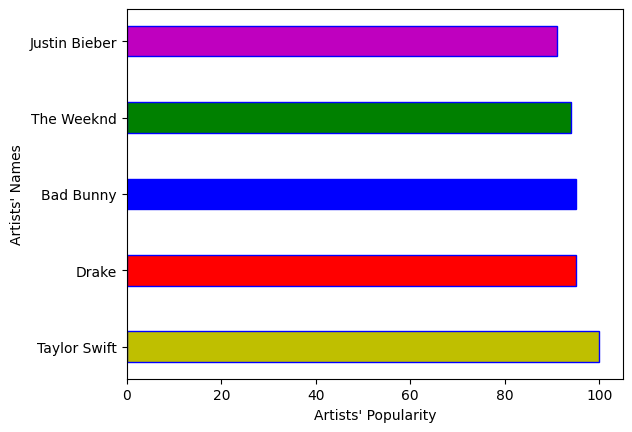

In [180]:
x=top_artist.index
y=top_artist.values
plt.xlabel("Artists' Popularity")
plt.ylabel("Artists' Names")
c=["y","r","b","g","m"]
plt.barh(x,y,color=c,height=0.4,edgecolor="b")
plt.show()


## Getting the artist's names who has the higghest number of followers

In [181]:
popular_artists=df.groupby(["artist_name"])["artist_followers"].max().sort_values(ascending=False).head()
popular_artists

artist_name
Taylor Swift     145542136
Ed Sheeran       122802777
Billie Eilish    118797451
The Weeknd       113039308
Ariana Grande    107418606
Name: artist_followers, dtype: int64

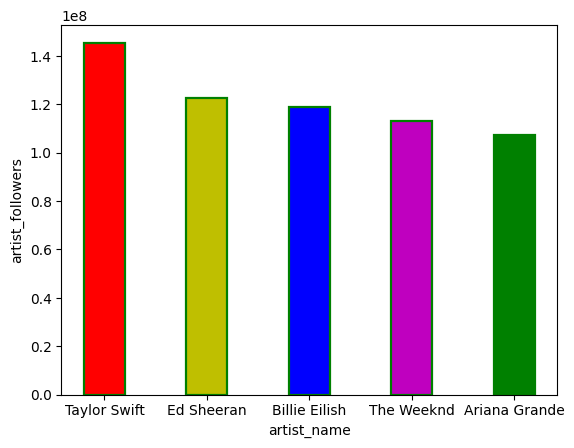

In [182]:
x=popular_artists.index
y=popular_artists.values
plt.xlabel("artist_name")
plt.ylabel("artist_followers")
c=["r","y","b","m","g"]
plt.bar(x,y,width=0.4,color=c,edgecolor="g",linewidth=1.6)
plt.show()

## Getting the artist's name who has the most popular track

In [183]:
artist_with_popular_track=df.loc[df["track_popularity"].idxmax(),["track_popularity","artist_name"]]
artist_with_popular_track

track_popularity         99
artist_name         HUNTR/X
Name: 457, dtype: object

## Highest listened albums

In [184]:
highest_listened_albums=df.groupby(["album_name"])["track_duration_min"].max().sort_values(ascending=False).head()
highest_listened_albums

album_name
Wish You Were Here                                                             13.51
Portrait Of An American Family                                                 13.15
Red (Expanded & Remastered Original Album Mix)                                 12.40
The Lord of the Rings: The Fellowship of the Ring - the Complete Recordings    11.53
The 20/20 Experience - 2 of 2 (Deluxe)                                         11.47
Name: track_duration_min, dtype: float64

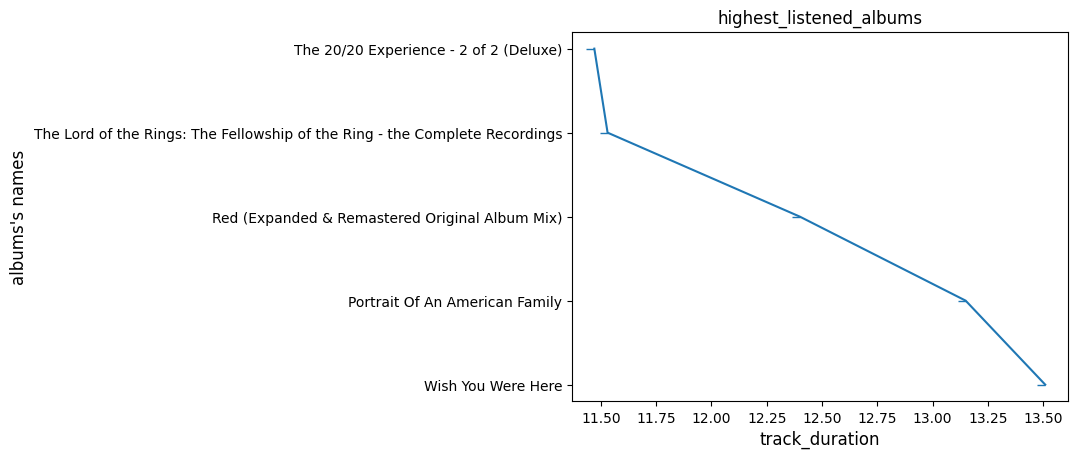

In [185]:
y=highest_listened_albums.index
x=highest_listened_albums.values
plt.plot(x,y,marker=0)
plt.ylabel("albums's names",fontsize=12)
plt.xlabel("track_duration",fontsize=12)
plt.title("highest_listened_albums")

plt.show()